# Assignment 3
KNN.py is my first iteration of the KNN algorithm with the distance functions hardcoded in, need to use strings.
KNN2.py is the second iteration of the KNN algorithm with a functional design.

In [18]:
#Mass imports here. Don't know what I'll end up using.
from KNN import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from error_metrics import *
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.metrics import r2_score
from sklearn import impute
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer
from KNN2 import *
from scipy.spatial import distance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
churn = pd.read_csv('churn_data.csv')

   Churn  Gender  Age  Income  FamilySize  Education  Calls  Visits
0      1       1   34       0           4         16     14       5
1      0       1   20       0           5         14     49       1
2      1       0   30       0           4         20     19       4
3      1       0   46       0           4         14     15       4
4      0       0   23       0           4         16     18       0


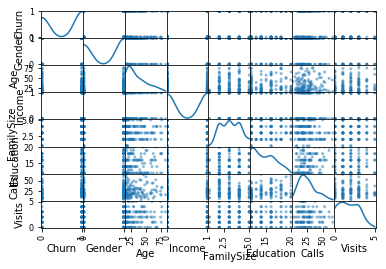

In [61]:
le = preprocessing.LabelEncoder()
minmax = preprocessing.MinMaxScaler()
#del churn['CustID']
print(churn.head())
pd.plotting.scatter_matrix(churn, diagonal='kde')
plt.show()

## Question 1.
Aha! Our response variable is the 'Churn' column. All the other columns are our predictor variables.
In other words, 'Churn' is the target, and everything but churn are our features.

In [66]:
label_time = ['Gender','Income','Churn']
# Customer ID should have no predictive power, so I'm deleting it.
#del churn['CustID']
churn['Gender'] = le.fit_transform(churn['Gender'])
churn['Income'] = le.fit_transform(churn['Income'])
churn['Churn'] = le.fit_transform(churn['Churn'])
churn.head()


,Churn,Gender,Age,Income,FamilySize,Education,Calls,Visits
0,1,1,34,0,4,16,14,5
1,0,1,20,0,5,14,49,1
2,1,0,30,0,4,20,19,4
3,1,0,46,0,4,14,15,4
4,0,0,23,0,4,16,18,0


In [89]:
churn = churn[['Churn','Gender', 'Age', 'Income', 'FamilySize', 'Education', 'Calls', 'Visits']]
churn2 = pd.get_dummies(churn, columns = ['Gender', 'Income'])
data_x = churn[list(churn)[1:]]
data_y = churn['Churn']
data_x2 = churn2[list(churn2)[1:]]
data_y2 = churn2['Churn']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=4)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_x2, data_y2, test_size=0.3, random_state=4)

In [90]:
print(churn.head())
churn2.head()

   Churn  Gender  Age  Income  FamilySize  Education  Calls  Visits
0      1       1   34       0           4         16     14       5
1      0       1   20       0           5         14     49       1
2      1       0   30       0           4         20     19       4
3      1       0   46       0           4         14     15       4
4      0       0   23       0           4         16     18       0


,Churn,Age,FamilySize,Education,Calls,Visits,Gender_0,Gender_1,Income_0,Income_1
0,1,34,4,16,14,5,0,1,1,0
1,0,20,5,14,49,1,0,1,1,0
2,1,30,4,20,19,4,1,0,1,0
3,1,46,4,14,15,4,1,0,1,0
4,0,23,4,16,18,0,1,0,1,0


In [69]:
x_train_pp = minmax.fit_transform(x_train)
x_test_pp = minmax.fit_transform(x_test)
x2_train_pp = minmax.fit_transform(x_train2)
x2_test_pp = minmax.fit_transform(x_test2)

C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Question 2:
Data transforms! After looking at the data, I found all of the categorical columns to be binary. I decided to label encode these columns. I originally planned on not one-hot encoding, but then I realized that since I was planning to use a multitude of different models in an attempt to maximize performance, and that different models look at the data differently, I should probably one-hot encode them as well. The one-hot encoded data I decided to make a different dataframe altogether, since that data might perform worse on certain models. That way I still had access to the label encoded data if I wanted to use it without the one-hot encoding.

Finally, I used a minmax scaler on the train test split objects prior to feeding them into models. Some models, like KNN, are sensitive to scale. Scaling variables in this way makes the data usable with models that are sensitive to scale, and shouldn't effect performace with models that are not sensitive to scale.

## Question 3
Since this is a classification problem, I am going to try most of the classification algorithms that we've seen in this class. The KNN algorithm I made, Random Forests, Support Vector Machines, and Naive Bayes. I'm expecting for the Random Forest and SVM approaches to have the best results, as far as a baseline without any feature selection goes.

### Quick KNN class readme, follwed by KNN testing
My homebrewed KNN class takes two arguments, k and distance_f. K is the number of neighbors that the algorithm will use in the voting process, and distance_f is the chosen distance function. This KNN classifier can use the euclidean distance and the cosine distance. Cosine seems to work better for this dataset. Make sure that when using this KNN class, when you specify the distance function, you do so as a string.

The fit method takes two arguments, z and y. Z is the training features and y is the cooresponding targets for those features.

The predict method only takes one argument, x, which is the test features. You can test the performace using sklearn. 

In [8]:
#Test my KNN class
knn = KNN(3, 'euclidean')
knn.fit(x_train_pp, y_train)
preds = knn.predict(x_test_pp)


print('Accuracy: ' + str(accuracy_score(y_test, preds)))
print('Precision: ' + str(precision_score(y_test, preds)))
print('Recall: ' + str(recall_score(y_test, preds)))
print('F1: ' + str(f1_score(y_test, preds)))
print('ROC AUC: ' + str(roc_auc_score(y_test, preds)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test, preds)))
#ITS ALIVE!!!!!

Accuracy: 0.717948717948718
Precision: 0.7777777777777778
Recall: 0.6666666666666666
F1: 0.717948717948718
ROC AUC: 0.7222222222222222
Confusion Matrix: 
[[14  4]
 [ 7 14]]


In [9]:
knn2 = KNN2(3, distance.cosine)
knn2.fit(x_train_pp, y_train)
preds2 = knn2.predict(x_test_pp)
print('Accuracy: ' + str(accuracy_score(y_test, preds2)))
print('Precision: ' + str(precision_score(y_test, preds2)))
print('Recall: ' + str(recall_score(y_test, preds2)))
print('F1: ' + str(f1_score(y_test, preds2)))
print('ROC AUC: ' + str(roc_auc_score(y_test, preds2)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test, preds2)))

Accuracy: 0.7948717948717948
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1: 0.8095238095238095
ROC AUC: 0.7936507936507937
Confusion Matrix: 
[[14  4]
 [ 4 17]]


In [84]:
#A little bit of naive model optimization
#Using the cosine measurement with the non-one-hot-encoded set
mod = KNN2(11, distance.cosine)
mod.fit(x_train_pp, y_train)
#Make Predictions and look at results.
y_hat = mod.predict(x_test_pp)
print('------------EVALUATING MODEL: k = ' + str(k) + '------------')
print('Accuracy: ' + str(accuracy_score(y_test, y_hat)))
print('Precision: ' + str(precision_score(y_test, y_hat)))
print('Recall: ' + str(recall_score(y_test, y_hat)))
print('F1: ' + str(f1_score(y_test, y_hat)))
print('ROC AUC: ' + str(roc_auc_score(y_test, y_hat)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test, y_hat)))



------------EVALUATING MODEL: k = 19------------
Accuracy: 0.8461538461538461
Precision: 0.8947368421052632
Recall: 0.8095238095238095
F1: 0.8500000000000001
ROC AUC: 0.8492063492063492
Confusion Matrix: 
[[16  2]
 [ 4 17]]


In [21]:
#using the cosine metric with the one-hot-encoded set
for k in ks:
    #Create model and fit.
    mod = KNN2(k, distance.cosine)
    mod.fit(x2_train_pp, y_train2)
    
    #Make Predictions and look at results.
    y_hat = mod.predict(x2_test_pp)
    print('------------EVALUATING MODEL: k = ' + str(k) + '------------')
    print('Accuracy: ' + str(accuracy_score(y_test, y_hat)))
    print('Precision: ' + str(precision_score(y_test, y_hat)))
    print('Recall: ' + str(recall_score(y_test, y_hat)))
    print('F1: ' + str(f1_score(y_test, y_hat)))
    print('ROC AUC: ' + str(roc_auc_score(y_test, y_hat)))
    print('Confusion Matrix: \n' + str(confusion_matrix(y_test, y_hat)))

------------EVALUATING MODEL: k = 3------------
Accuracy: 0.7435897435897436
Precision: 0.7894736842105263
Recall: 0.7142857142857143
F1: 0.7500000000000001
ROC AUC: 0.746031746031746
Confusion Matrix: 
[[14  4]
 [ 6 15]]
------------EVALUATING MODEL: k = 5------------
Accuracy: 0.8205128205128205
Precision: 0.85
Recall: 0.8095238095238095
F1: 0.8292682926829269
ROC AUC: 0.8214285714285714
Confusion Matrix: 
[[15  3]
 [ 4 17]]
------------EVALUATING MODEL: k = 7------------
Accuracy: 0.7948717948717948
Precision: 0.9333333333333333
Recall: 0.6666666666666666
F1: 0.7777777777777778
ROC AUC: 0.8055555555555555
Confusion Matrix: 
[[17  1]
 [ 7 14]]
------------EVALUATING MODEL: k = 9------------
Accuracy: 0.7435897435897436
Precision: 0.9230769230769231
Recall: 0.5714285714285714
F1: 0.7058823529411765
ROC AUC: 0.7579365079365079
Confusion Matrix: 
[[17  1]
 [ 9 12]]
------------EVALUATING MODEL: k = 11------------
Accuracy: 0.7435897435897436
Precision: 0.9230769230769231
Recall: 0.57142

Using the cosine distance seems to get us better performance across the board. KNN seems to not like the one-hot encoded data as much either.

### Random Forest with Gridsearch!

In [101]:
param_grid = {'n_estimators':np.arange(1,100), 'max_depth':np.arange(1,20)}

#construct searching object
optimized_rf = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

#fit to find best model
optimized_rf.fit(x_train, y_train)

#evaluate
print('Grid search test score (Random Forest): ' +str(optimized_rf.score(x_test, y_test)))


Grid search test score (Random Forest): 0.8205128205128205


C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
param_grid = {'n_estimators':np.arange(1,100), 'max_depth':np.arange(1,20)}

#construct searching object
optimized_rf2 = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

#fit to find best model
optimized_rf2.fit(x_train_pp, y_train)

#evaluate
print('Grid search test score (Random Forest): ' +str(optimized_rf2.score(x_test_pp, y_test)))

KeyboardInterrupt: 

In [64]:
optimized_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

2000 random forests takes quite a while, so I'm only going to run each of these once. 

In [24]:
param_grid2 = {'n_estimators':np.arange(1,100), 'max_depth':np.arange(1,20)}

#construct searching object
optimized_rf2 = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5)

#fit to find best model
optimized_rf2.fit(x_train2, y_train2)

#evaluate
print('Grid search test score (Random Forest): ' +str(optimized_rf2.score(x_test2, y_test2)))

Grid search test score (Random Forest): 0.7435897435897436


C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Generally speaking, using the one-hot encoded data results in worse performance with a random forest.

### Support Vector Machine

In [31]:
param_gridSVM = {'C':np.arange(.1, 15), 'gamma':np.arange(.1, 15)}

#construct searching object
optimized_svm = GridSearchCV(svm.SVC(), param_gridSVM, cv=5)

#fit to find best model
optimized_svm.fit(x_train, y_train)

#evaluate
print('Grid search test score (Random Forest): ' +str(optimized_svm.score(x_test, y_test)))

Grid search test score (Random Forest): 0.5641025641025641


C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ouch

In [33]:
param_gridSVM = {'C':np.arange(.1, 15), 'gamma':np.arange(.1, 15)}

#construct searching object
optimized_svm2 = GridSearchCV(svm.SVC(), param_gridSVM, cv=5)

#fit to find best model
optimized_svm2.fit(x_train2, y_train2)

#evaluate
print('Grid search test score (Random Forest): ' +str(optimized_svm2.score(x_test2, y_test2)))

Grid search test score (Random Forest): 0.5897435897435898


C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Yeah SVMs don't seem to be doing so hot... on the flipside, they seem to prefer the one-hot encoded data by a small amount.

### Naive Bayes

In [91]:
gnb_mod = naive_bayes.GaussianNB()
gnb_mod.fit(x_train, y_train)
y_hat = gnb_mod.predict(x_test)

print('Accuracy: ' + str(accuracy_score(y_test, y_hat)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test, y_hat)))

Accuracy: 0.7692307692307693
Confusion Matrix: 
[[15  3]
 [ 6 15]]


In [39]:
gnb_mod2 = naive_bayes.GaussianNB()
gnb_mod2.fit(x_train2, y_train2)
y_hat2 = gnb_mod2.predict(x_test2)

print('Accuracy: ' + str(accuracy_score(y_test2, y_hat2)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test2, y_hat2)))

Accuracy: 0.6923076923076923
Confusion Matrix: 
[[15  3]
 [ 9 12]]


Not suprised. The assumption of independance + the assumption of a normal distribution in continuous variables limits the usability of Naive Bayes. 76 isn't bad though, its a bit better than the KNN using euclidean distance with K=3. Again, Naive Bayes would rather not have one-hot encoded data.

### Adding in feature selection
Going to use RFECV to try and guaruntee optimal features.

In [43]:
selector_rf = RFECV(estimator=linear_model.LinearRegression(), cv=5, scoring=make_scorer(r2_score))
selector_rf.fit(x_train, y_train)

#get the features-selected data
xt_train, xt_test = selector_rf.transform(x_train), selector_rf.transform(x_test)

In [44]:
optimized_rf_fs = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5)

#fit to find best model
optimized_rf_fs.fit(xt_train, y_train)

C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 6 

In [46]:
print('Grid search test score (Random Forest): ' +str(optimized_rf_fs.score(xt_test, y_test)))

Grid search test score (Random Forest): 0.8205128205128205


I ran this twice, once using Random Forest as the estimator, second with Linear Regression. Interestingly, the performance stayed around the same (the exact same?) with Random Forest as the estimator. With Linear Regression as the estimator, the performance increased. 

In [48]:
#Naive bayes with feature selection
gnb_mod.fit(xt_train, y_train)
y_hat = gnb_mod.predict(xt_test)

print('Accuracy: ' + str(accuracy_score(y_test, y_hat)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_test, y_hat)))

Accuracy: 0.7435897435897436
Confusion Matrix: 
[[14  4]
 [ 6 15]]


In [50]:
optimized_rf_fs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
rf_best = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Question 4
For the KNN classifier, I used: Accuracy, Precision, Recall, F1, ROC AUC, and a Confusion Matrix. These would give me overall a good idea of the performance on the data. I ended up getting a maximum accuracy of around .84 on the preprocessed and scaled data, which isn't horrible but not great either.
The next algorithm I tried was the Random Forest. I managed to use gridsearch to get a max score of .86, which was higher than my KNN, but didn't crack .9 like I wanted (repreated runs ended at .82). I used gridsearchcv.best_estimator_ to find the specific parameters it used on the Random Forest to recreate it for the validation set later. I used accuracy to measure the Random Forests. I moved on from Random Forests to Support Vector Machines, and I was excited, I was hoping that their performance would be the best. SVMs were horrible! So horrible that I didn't even bother using gridsearch to try and optimize them, and I didn't even bother to use them on the validation set of data. I was getting accuracy scores of like .5. The last thing I did was a Naive Bayes algorithm. I used accuracy and a confusion matrix to measure performance of NB. NB was decent, with accuracy of .76. I also tried using RFECV, but across the board the feature selection ended up getting lower performance, so I didn't end up using feature selection at all on the validation data.

# Taking models for a spin on the holdout data

In [54]:
churn_v = pd.read_csv('churn_validation.csv')
churn_v['Gender'] = le.fit_transform(churn_v['Gender'])
churn_v['Income'] = le.fit_transform(churn_v['Income'])
churn_v['Churn'] = le.fit_transform(churn_v['Churn'])
churn_v = churn_v[['Churn','Gender', 'Age', 'Income', 'FamilySize', 'Education', 'Calls', 'Visits']]
churn2v = pd.get_dummies(churn_v, columns = ['Gender', 'Income'])
data_xv = churn_v[list(churn_v)[1:]]
data_yv = churn_v['Churn']
data_x2v = churn2v[list(churn2v)[1:]]
data_y2v = churn2v['Churn']
x_trainv, x_testv, y_trainv, y_testv = train_test_split(data_xv, data_yv, test_size=0.3, random_state=4)
x_train2v, x_test2v, y_train2v, y_test2v = train_test_split(data_x2v, data_y2v, test_size=0.3, random_state=4)
churn_v.head()

,Churn,Gender,Age,Income,FamilySize,Education,Calls,Visits
0,1,1,54,1,4,18,48,3
1,1,1,21,0,4,19,44,2
2,1,0,22,0,3,16,22,5
3,1,1,27,1,3,13,19,2
4,0,1,18,0,2,14,6,3


In [55]:
x_train_ppv = minmax.fit_transform(x_trainv)
x_test_ppv = minmax.fit_transform(x_testv)
x2_train_ppv = minmax.fit_transform(x_train2v)
x2_test_ppv = minmax.fit_transform(x_test2v)
xt_trainv, xt_testv = selector_rf.transform(x_train), selector_rf.transform(x_test)

C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\xxzac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [97]:
y_hat1 = rf_best.predict(data_xv)
print_multiclass_classif_error_report(y_hat1, data_yv)

Accuracy: 0.71875
Avg. F1 (Micro): 0.71875
Avg. F1 (Macro): 0.7117117117117117
Avg. F1 (Weighted): 0.7173423423423423
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.64      0.69      0.67        13

   micro avg       0.72      0.72      0.72        32
   macro avg       0.71      0.71      0.71        32
weighted avg       0.72      0.72      0.72        32

Confusion Matrix: 
[[14  4]
 [ 5  9]]


Oof, looks like I overfit.

In [98]:
y_hat2 = mod.predict(x_test_ppv)
print('------------EVALUATING MODEL: k = 11------------')
print('Accuracy: ' + str(accuracy_score(y_testv, y_hat2)))
print('Precision: ' + str(precision_score(y_testv, y_hat2)))
print('Recall: ' + str(recall_score(y_testv, y_hat2)))
print('F1: ' + str(f1_score(y_testv, y_hat2)))
print('ROC AUC: ' + str(roc_auc_score(y_testv, y_hat2)))
print('Confusion Matrix: \n' + str(confusion_matrix(y_testv, y_hat2)))

------------EVALUATING MODEL: k = 11------------
Accuracy: 0.7
Precision: 0.5
Recall: 0.6666666666666666
F1: 0.5714285714285715
ROC AUC: 0.6904761904761905
Confusion Matrix: 
[[5 2]
 [1 2]]


In [99]:
y_hat3 = gnb_mod.predict(data_xv)

print('Accuracy: ' + str(accuracy_score(data_yv, y_hat3)))
print('Confusion Matrix: \n' + str(confusion_matrix(data_yv, y_hat3)))

Accuracy: 0.71875
Confusion Matrix: 
[[14  5]
 [ 4  9]]


### Question 5
The best algorithms I made were my KNN and the Random Forest, using all the features. 

### Question 6
See above! My random forest and Naive Bayes models both had the same accuracy at .71875!

### Question 7
Would I consider this a reliable algorithm for predicting churn in the field? I'd say no. 70% accuracy isn't really good enough for me at least, especially considering that its a binary problem. Not only that but the rate of false negatives and false positives seems similar, or at least close to one another. For churn, it might be better for example to have more false positives than negatives, or maybe the other way around, who knows. But with false negatives and false positives so close to one another added to the mediocre accuracy just makes it hard to trust the model.